In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from itertools import chain

import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
input_dir = "./input/movielens-mllatestsmall"
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
chunk_size = 200000

./input/movielens-mllatestsmall\ml-latest-small\links.csv
./input/movielens-mllatestsmall\ml-latest-small\movies.csv
./input/movielens-mllatestsmall\ml-latest-small\ratings.csv
./input/movielens-mllatestsmall\ml-latest-small\README.txt
./input/movielens-mllatestsmall\ml-latest-small\tags.csv


In [2]:
### READING CSV FILES ###

# movies_dataframe = pd.read_csv(input_dir + "/ml-25m/movies.csv",header=0)
movies_dataframe = pd.read_csv(input_dir + "/ml-latest-small/movies.csv",header=0)
# movies_dataframe["title"] = movies_dataframe["title"].str.split("(").str[0].str.rstrip().str.split(" ")
movies_dataframe["genres"] = movies_dataframe["genres"].str.split("|")
# tags_dataframe = pd.read_csv(input_dir + "/ml-25m/tags.csv",header=0).drop(["timestamp","userId"],axis=1)
# genome_tags_dataframe = pd.read_csv(input_dir + "/ml-25m/genome-tags.csv",header=0)

# huge datasets reading
ratings_dataframe = []
# for chunk in pd.read_csv(input_dir + "/ml-25m/ratings.csv",header=0,chunksize=chunk_size):
for chunk in pd.read_csv(input_dir + "/ml-latest-small/ratings.csv",header=0,chunksize=chunk_size):
#     print(chunk.size)
    chunk = chunk.drop(["timestamp"],axis=1)
    ratings_dataframe.append(chunk)
ratings_dataframe = pd.concat(ratings_dataframe,axis=0)

# genome_scores_dataframe = []
# for chunk in pd.read_csv(input_dir + "/ml-25m/genome-scores.csv",header=0,chunksize=chunk_size):
# #     print(chunk.size)
#     genome_scores_dataframe.append(chunk)
# genome_scores_dataframe = pd.concat(genome_scores_dataframe,axis=0)

print("DONE READING")

DONE READING


In [3]:
print(movies_dataframe.shape)
print(movies_dataframe.head(1))
print("\n\n")
print(ratings_dataframe.shape)
print(ratings_dataframe.head(1))
print("\n\n")

# print(tags_dataframe.shape)
# print(tags_dataframe.head(1))
# print("\n\n")
# print(genome_tags_dataframe.shape)
# print(genome_tags_dataframe.head(1))
# print("\n\n")
# print(genome_scores_dataframe.shape)
# print(genome_scores_dataframe.head(1))
# print("\n\n")

(9742, 3)
   movieId             title  \
0        1  Toy Story (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  



(100836, 3)
   userId  movieId  rating
0       1        1     4.0





In [4]:
ratings_dataframe = ratings_dataframe.groupby("movieId")
ratings_dataframe = pd.DataFrame({
    "movieId" : ratings_dataframe["movieId"],
    "score" : ratings_dataframe.count()["rating"],
    "rating" : ratings_dataframe.mean()["rating"]
})
ratings_dataframe = ratings_dataframe.drop("movieId",axis=1)
movies_dataframe = pd.merge(ratings_dataframe, movies_dataframe, on='movieId')
del ratings_dataframe

movies_dataframe

,movieId,score,rating,title,genres
0,1,215,3.920930,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,110,3.431818,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,52,3.259615,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,7,2.357143,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,49,3.071429,Father of the Bride Part II (1995),[Comedy]
...,...,...,...,...,...
9719,193581,1,4.000000,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9720,193583,1,3.500000,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9721,193585,1,3.500000,Flint (2017),[Drama]
9722,193587,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [5]:
genres_lens = movies_dataframe['genres'].map(len)
movies_dataframe = pd.DataFrame({
    'movieId': np.repeat(movies_dataframe['movieId'], genres_lens),
    'score': np.repeat(movies_dataframe['score'], genres_lens),
    'rating': np.repeat(movies_dataframe['rating'], genres_lens),
    'title': np.repeat(movies_dataframe['title'], genres_lens),
    'genre': chain.from_iterable(movies_dataframe['genres'])
})
movies_dataframe

,movieId,score,rating,title,genre
0,1,215,3.92093,Toy Story (1995),Adventure
0,1,215,3.92093,Toy Story (1995),Animation
0,1,215,3.92093,Toy Story (1995),Children
0,1,215,3.92093,Toy Story (1995),Comedy
0,1,215,3.92093,Toy Story (1995),Fantasy
...,...,...,...,...,...
9720,193583,1,3.50000,No Game No Life: Zero (2017),Fantasy
9721,193585,1,3.50000,Flint (2017),Drama
9722,193587,1,3.50000,Bungo Stray Dogs: Dead Apple (2018),Action
9722,193587,1,3.50000,Bungo Stray Dogs: Dead Apple (2018),Animation


In [6]:
# title_lens = movies_dataframe['title'].map(len)
# movies_dataframe = pd.DataFrame({'movieId': np.repeat(movies_dataframe['movieId'], title_lens),
#               'rating': np.repeat(movies_dataframe['rating'], title_lens),
#               'genre': np.repeat(movies_dataframe['genre'], title_lens),
#               'title': chain.from_iterable(movies_dataframe['title'])
#              })
# movies_dataframe.head(1)

In [7]:

# tags = pd.merge(genome_scores_dataframe, genome_tags_dataframe, on='tagId').drop(["tagId"],axis=1)
# del genome_scores_dataframe,genome_tags_dataframe

# tags_dataframe = pd.merge(tags, tags_dataframe,  how='left', left_on=['movieId','tag'], right_on = ['movieId','tag'])
# del tags

# tags_dataframe

In [8]:
genre_rating_avg = movies_dataframe.groupby("genre")["rating"].mean()
genre_rating_avg = pd.DataFrame({'genre':genre_rating_avg.index, 'genre_rating':genre_rating_avg.values})

movies_dataframe = pd.merge(movies_dataframe,genre_rating_avg,on="genre")

movies_dataframe

,movieId,score,rating,title,genre,genre_rating
0,1,215,3.920930,Toy Story (1995),Adventure,3.215230
1,2,110,3.431818,Jumanji (1995),Adventure,3.215230
2,8,8,2.875000,Tom and Huck (1995),Adventure,3.215230
3,10,132,3.496212,GoldenEye (1995),Adventure,3.215230
4,13,8,3.125000,Balto (1995),Adventure,3.215230
...,...,...,...,...,...,...
22041,174403,1,2.500000,The Putin Interviews (2017),(no genres listed),3.371148
22042,176601,1,5.000000,Black Mirror,(no genres listed),3.371148
22043,181413,1,4.500000,Too Funny to Fail: The Life and Death of The D...,(no genres listed),3.371148
22044,181719,1,3.500000,Serving in Silence: The Margarethe Cammermeyer...,(no genres listed),3.371148


In [9]:
# genres_title = movies_dataframe.drop(["score","rating","genre_rating"],axis=1)
# movies_dataframe = movies_dataframe.drop(["genre","title"],axis=1)

# movies_dataframe

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=100).fit(movies_dataframe.drop(["movieId","genre","title"],axis=1))
centroids = kmeans.cluster_centers_
# print(centroids)
cluster_map = pd.DataFrame()
# cluster_map['data_index'] = movies_dataframe.index.values
cluster_map['category'] = kmeans.labels_
cluster_map

,category
0,87
1,25
2,48
3,24
4,48
...,...
22041,93
22042,47
22043,74
22044,77


In [11]:
movies_dataframe = pd.merge(movies_dataframe,cluster_map,left_index=True,right_index=True)
movies_dataframe

,movieId,score,rating,title,genre,genre_rating,category
0,1,215,3.920930,Toy Story (1995),Adventure,3.215230,87
1,2,110,3.431818,Jumanji (1995),Adventure,3.215230,25
2,8,8,2.875000,Tom and Huck (1995),Adventure,3.215230,48
3,10,132,3.496212,GoldenEye (1995),Adventure,3.215230,24
4,13,8,3.125000,Balto (1995),Adventure,3.215230,48
...,...,...,...,...,...,...,...
22041,174403,1,2.500000,The Putin Interviews (2017),(no genres listed),3.371148,93
22042,176601,1,5.000000,Black Mirror,(no genres listed),3.371148,47
22043,181413,1,4.500000,Too Funny to Fail: The Life and Death of The D...,(no genres listed),3.371148,74
22044,181719,1,3.500000,Serving in Silence: The Margarethe Cammermeyer...,(no genres listed),3.371148,77


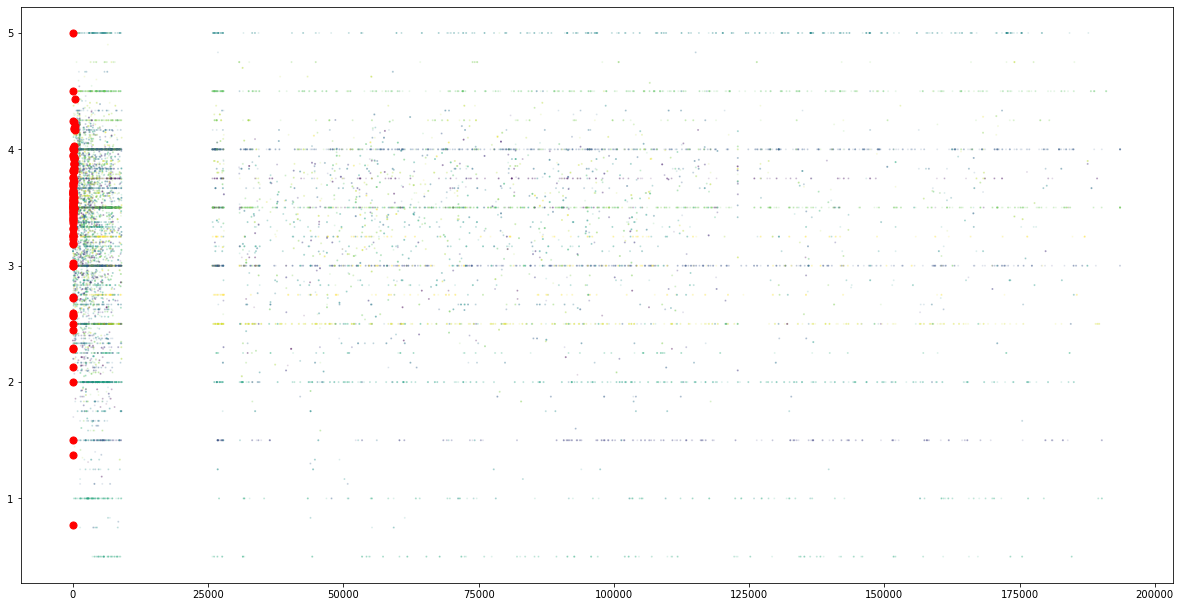

In [12]:
fig = plt.figure(figsize=(20,10))
graph = fig.add_axes([0.1,0.1,0.8,0.8])
graph.scatter(movies_dataframe['movieId'], movies_dataframe['rating'], c= kmeans.labels_.astype(float), s=1, alpha=0.1)
graph.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

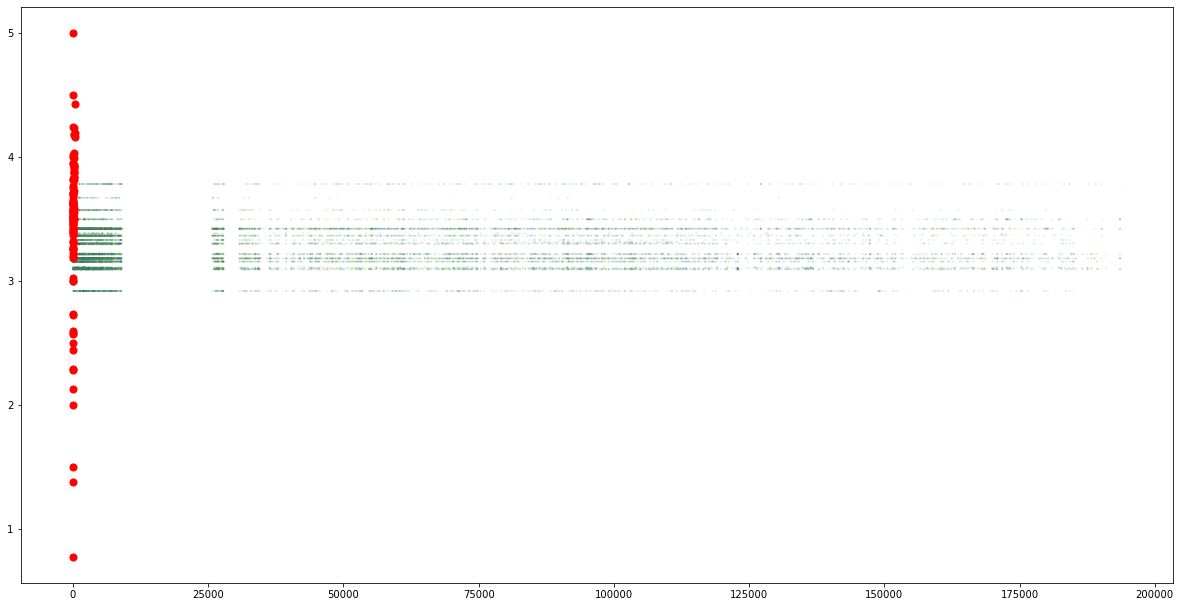

In [13]:
fig = plt.figure(figsize=(20,10))
graph = fig.add_axes([0.1,0.1,0.8,0.8])
graph.scatter(movies_dataframe['movieId'], movies_dataframe['genre_rating'], c= kmeans.labels_.astype(float), s=1, alpha=0.1)
graph.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

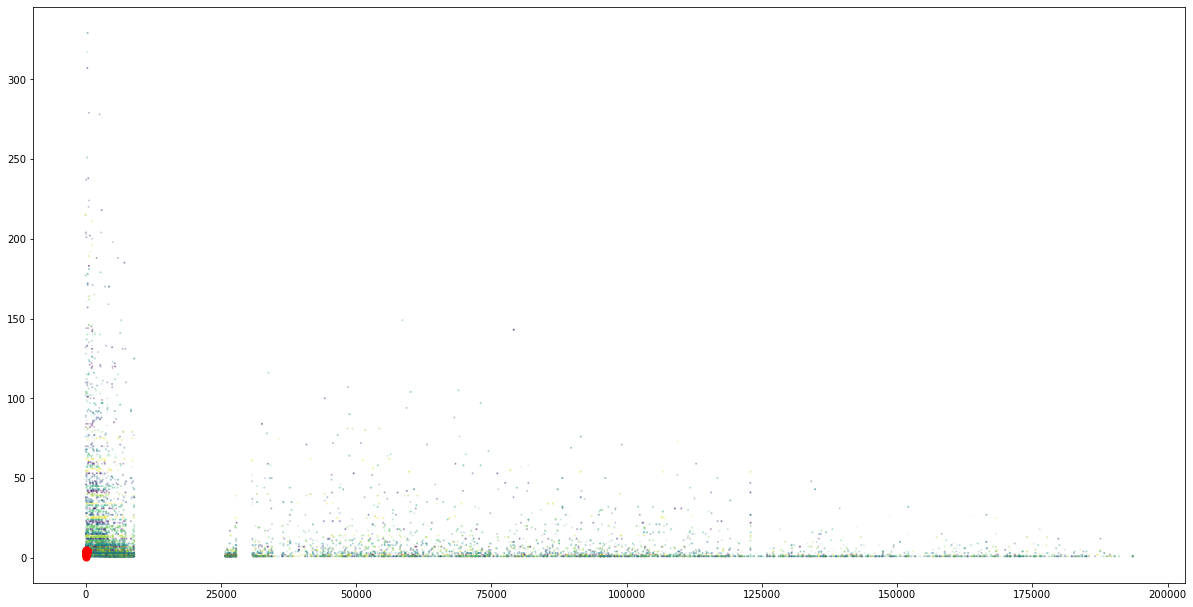

In [14]:
fig = plt.figure(figsize=(20,10))
graph = fig.add_axes([0.1,0.1,0.8,0.8])
graph.scatter(movies_dataframe['movieId'], movies_dataframe['score'], c= kmeans.labels_.astype(float), s=1, alpha=0.1)
graph.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [46]:
movies_dataframe.to_csv("./output/movies.csv", mode='w',index=False, header=True)
movies_dataframe.to_csv("./Application/output/movies.csv", mode='w',index=False, header=True)
# tags_dataframe.to_csv('tags.csv', mode='w',index=False, header=True)
print("DONE WRITING")

DONE WRITING


In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(movies_dataframe.drop(["movieId","title","genre","category"],axis=1), movies_dataframe["category"])

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
test = pd.DataFrame({
    "movieId" : np.array([8644,32031,136800,140174,140627,141818,141994]),
    "title" : np.array(["I, Robot (2004)","Robots (2005)","Robot Overlords (2014)","Room (2015)","Battle For Sevastopol (2015)","Ordinary Miracle (1978)","Saving Christmas (2014)"]),
    "genres" : np.array(["Action|Adventure|Sci-Fi|Thriller","Adventure|Animation|Children|Comedy|Fantasy|Sci-Fi|IMAX","Action|Adventure|Sci-Fi","Drama","Drama|Romance|War","Comedy|Drama|Fantasy|Romance","Children|Comedy"])
})
test

,movieId,title,genres
0,8644,"I, Robot (2004)",Action|Adventure|Sci-Fi|Thriller
1,32031,Robots (2005),Adventure|Animation|Children|Comedy|Fantasy|Sc...
2,136800,Robot Overlords (2014),Action|Adventure|Sci-Fi
3,140174,Room (2015),Drama
4,140627,Battle For Sevastopol (2015),Drama|Romance|War
5,141818,Ordinary Miracle (1978),Comedy|Drama|Fantasy|Romance
6,141994,Saving Christmas (2014),Children|Comedy


In [35]:
test["genres"] = test["genres"].str.split("|")
genres_lens = test['genres'].map(len)
test = pd.DataFrame({
    'movieId': np.repeat(test['movieId'], genres_lens),
    'title': np.repeat(test['title'], genres_lens),
    'genre': chain.from_iterable(test['genres'])
})

test

,movieId,title,genre
0,8644,"I, Robot (2004)",Action
0,8644,"I, Robot (2004)",Adventure
0,8644,"I, Robot (2004)",Sci-Fi
0,8644,"I, Robot (2004)",Thriller
1,32031,Robots (2005),Adventure
1,32031,Robots (2005),Animation
1,32031,Robots (2005),Children
1,32031,Robots (2005),Comedy
1,32031,Robots (2005),Fantasy
1,32031,Robots (2005),Sci-Fi


In [36]:
most_frequent_genre = test.groupby("genre").count()["title"].max()
most_frequent_genre = test.groupby("genre").count().loc[test.groupby("genre").count()["title"] == most_frequent_genre]
most_frequent_genre["title"].index

Index(['Adventure', 'Comedy', 'Drama', 'Sci-Fi'], dtype='object', name='genre')

In [37]:
df = movies_dataframe.loc[movies_dataframe['genre'].isin(most_frequent_genre.index)]
df["rating"] = (df["rating"] + 5.0) // 2

genre_rating = df.groupby("genre")["rating"].mean()
genre_rating = pd.DataFrame({
    "genre" : genre_rating.index,
    "genre_rating" :  (genre_rating.values) // 1
})

df = pd.merge(df.drop("genre_rating",axis=1),genre_rating,on="genre")
df["score"] = df["score"] + 1
df

<ipython-input-37-a2a9828ee613>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"] = (df["rating"] + 5) // 2


,movieId,score,rating,title,genre,category,genre_rating
0,1,216,4.0,Toy Story (1995),Adventure,87,3.0
1,2,111,4.0,Jumanji (1995),Adventure,25,3.0
2,8,9,3.0,Tom and Huck (1995),Adventure,48,3.0
3,10,133,4.0,GoldenEye (1995),Adventure,24,3.0
4,13,9,4.0,Balto (1995),Adventure,48,3.0
...,...,...,...,...,...,...,...
10339,188301,4,4.0,Ant-Man and the Wasp (2018),Sci-Fi,37,3.0
10340,189547,2,3.0,Iron Soldier (2010),Sci-Fi,62,3.0
10341,190183,2,4.0,The Darkest Minds (2018),Sci-Fi,77,3.0
10342,191005,2,4.0,Gintama (2017),Sci-Fi,74,3.0


In [38]:
category = model.predict(df.drop(["movieId","title","genre","category"],axis=1))
df["category"] = category

df

,movieId,score,rating,title,genre,category,genre_rating
0,1,216,4.0,Toy Story (1995),Adventure,87,3.0
1,2,111,4.0,Jumanji (1995),Adventure,25,3.0
2,8,9,3.0,Tom and Huck (1995),Adventure,54,3.0
3,10,133,4.0,GoldenEye (1995),Adventure,24,3.0
4,13,9,4.0,Balto (1995),Adventure,54,3.0
...,...,...,...,...,...,...,...
10339,188301,4,4.0,Ant-Man and the Wasp (2018),Sci-Fi,89,3.0
10340,189547,2,3.0,Iron Soldier (2010),Sci-Fi,99,3.0
10341,190183,2,4.0,The Darkest Minds (2018),Sci-Fi,79,3.0
10342,191005,2,4.0,Gintama (2017),Sci-Fi,79,3.0


In [40]:
frequent_category = df.groupby("category").count()["title"]
frequent_category = frequent_category.loc[frequent_category.max() == frequent_category.values].index

df = df.loc[df['category'].isin(frequent_category.values)]
df = df.loc[~df['movieId'].isin(test["movieId"])]

df = df.drop_duplicates(subset=['movieId',"title","score","rating"])

df

,movieId,score,rating,title,genre,category,genre_rating
90,970,2,4.0,Beat the Devil (1953),Adventure,79,3.0
93,1008,2,4.0,"Davy Crockett, King of the Wild Frontier (1955)",Adventure,79,3.0
181,2037,2,4.0,Candleshoe (1977),Adventure,79,3.0
188,2056,2,4.0,In Search of the Castaways (1962),Adventure,79,3.0
227,2370,2,4.0,"Emerald Forest, The (1985)",Adventure,79,3.0
...,...,...,...,...,...,...,...
10321,175197,2,4.0,The Dark Tower (2017),Sci-Fi,79,3.0
10324,179053,2,4.0,2048: Nowhere to Run (2017),Sci-Fi,79,3.0
10326,182639,2,4.0,The Second Renaissance Part II (2003),Sci-Fi,79,3.0
10329,183635,2,4.0,Maze Runner: The Death Cure (2018),Sci-Fi,79,3.0


In [45]:
top100_watched = df.nlargest(50,["score"])
top10_rated = top100_watched.nlargest(10,["rating"])

top10_rated

,movieId,score,rating,title,genre,category,genre_rating
347,3687,2,5.0,Light Years (Gandahar) (1988),Adventure,79,3.0
381,4135,2,5.0,"Monster Squad, The (1987)",Adventure,79,3.0
451,5244,2,5.0,Shogun Assassin (1980),Adventure,79,3.0
90,970,2,4.0,Beat the Devil (1953),Adventure,79,3.0
93,1008,2,4.0,"Davy Crockett, King of the Wild Frontier (1955)",Adventure,79,3.0
181,2037,2,4.0,Candleshoe (1977),Adventure,79,3.0
188,2056,2,4.0,In Search of the Castaways (1962),Adventure,79,3.0
227,2370,2,4.0,"Emerald Forest, The (1985)",Adventure,79,3.0
246,2483,2,4.0,"Day of the Beast, The (Día de la Bestia, El) (...",Adventure,79,3.0
254,2632,2,4.0,"Saragossa Manuscript, The (Rekopis znaleziony ...",Adventure,79,3.0
